# **PCA Project with Two dataset (Breast cancer & CIFAR10)**

# Call Libraries & Datasets

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.optimizers import RMSprop
from tabulate import tabulate
from mpl_toolkits.mplot3d import Axes3D
#------------------------------------#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.datasets import load_breast_cancer
from keras.datasets import cifar10

# Load Breast Cancer Dataset

In [3]:
# Load the Breast Cancer dataset
breast = load_breast_cancer()

In [4]:
# Extract the data and labels
breast_data = breast.data
breast_labels = breast.target

In [5]:
# Check the shapes of data and labels
print(breast_data.shape)
print(breast_labels.shape)

(569, 30)
(569,)


# Concatenate Data and Labels, Create DataFrame, and Replace Labels

In [6]:
# Reshape labels to match the data shape
labels = np.reshape(breast_labels,(569,1))

In [7]:
# Concatenate data and labels
final_breast_data = np.concatenate([breast_data,labels],axis=1)

In [8]:
final_breast_data.shape

(569, 31)

In [9]:
# Create a DataFrame
breast_dataset = pd.DataFrame(final_breast_data)

In [10]:
# Add feature names as column headers
features = breast.feature_names
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels

In [11]:
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [12]:
# Replace labels 0 and 1 with 'Benign' and 'Malignant'
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)

In [13]:
# Display the first few rows of the dataset
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Benign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Benign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Benign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Benign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Benign


In [14]:
# Display the last few rows of the dataset
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


# Load Cifar10 Dataset

In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
# Display shapes of training and testing data
print('Traning data shape:', x_train.shape)
print('Testing data shape:', x_test.shape)

Traning data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


In [ ]:
# Shapes of labels
y_train.shape,y_test.shape

((50000, 1), (10000, 1))

In [ ]:
# Find unique classes in training labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [ ]:
# Dictionary for mapping class numbers to names
label_dict = {
 0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck',
}

# Display the first image in training data & in testng data

Text(0.5, 1.0, '(Label: frog)')
Text(0.5, 1.0, '(Label: cat)')


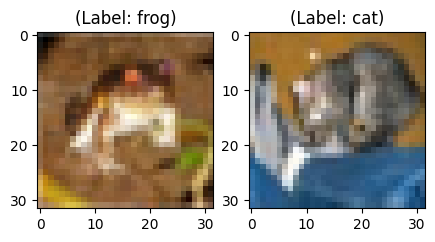

In [ ]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(x_train[0], (32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_train[0][0]]) + ")"))

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(x_test[0],(32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_test[0][0]]) + ")"))

# Normalizing the features

In [15]:
# Get the features and labels from the breast dataset
x = breast_dataset.loc[:, features].values

# normalizing the features
x = StandardScaler().fit_transform(x)

In [16]:
# Checking shape of normalized features
x.shape

(569, 30)

In [17]:
# Checking mean and standard deviation after normalization
np.mean(x),np.std(x)

(-6.826538293184326e-17, 1.0)

In [18]:
# Creating feature columns for the normalized data
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]

In [19]:
# Creating a DataFrame for the normalized data
normalised_breast = pd.DataFrame(x,columns=feat_cols)

In [20]:
# Displaying the last few rows of the normalized breast dataset
normalised_breast.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


# **Two Components Breast Cancer Dataset & Plot**

+-----+-----------------------+-----------------------+
|     | principal component 1 | principal component 2 |
+-----+-----------------------+-----------------------+
| 564 |   6.439315483954046   |  -3.5768174440144023  |
| 565 |   3.793382370032739   |  -3.584047863943381   |
| 566 |   1.256179276150211   |  -1.9022967130439092  |
| 567 |  10.374794059769544   |  1.6720101055350347   |
| 568 |  -5.475243302544555   |  -0.6706367906454741  |
+-----+-----------------------+-----------------------+
Explained variation per principal component: [0.44272026 0.18971182]


<Figure size 640x480 with 0 Axes>

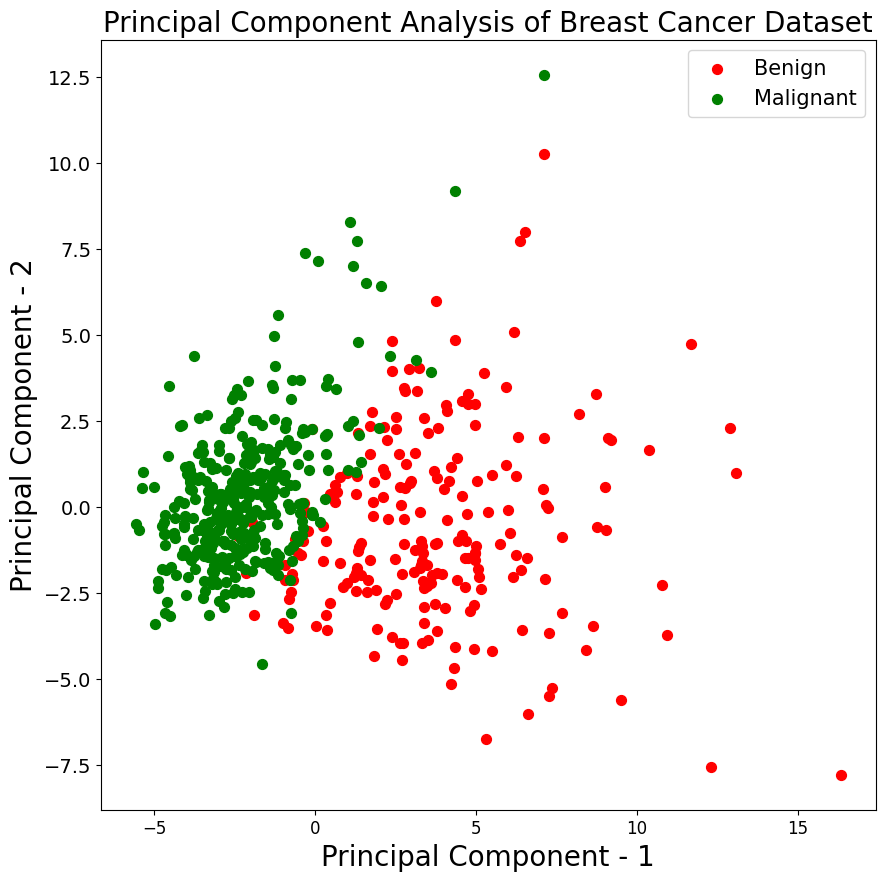

In [21]:
# Perform PCA with 2 components
pca_breast2 = PCA(n_components = 2)
principalComponents_breast2 = pca_breast2.fit_transform(x)

# Create a DataFrame for the principal components
principal_breast_Df2 = pd.DataFrame(data = principalComponents_breast2
             , columns = ['principal component 1', 'principal component 2'])


# Print the last few rows
table2 = tabulate(principal_breast_Df2.tail(), headers='keys', tablefmt='pretty')
print(table2)

# Print explained variation per principal component
print('Explained variation per principal component: {}'.format(pca_breast2.explained_variance_ratio_))

# Plot the principal components for Breast Cancer Dataset (2 components)
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df2.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df2.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

# **Three Components Breast Cancer Dataset & Plot**

+-----+-----------------------+-----------------------+-----------------------+
|     | principal component 1 | principal component 2 | principal component 3 |
+-----+-----------------------+-----------------------+-----------------------+
| 564 |   6.439315456940929   |  -3.5768172072534417  |   2.459489179084255   |
| 565 |   3.793382396216037   |  -3.584048059508093   |  2.0884738614099803   |
| 566 |  1.2561792968001662   |  -1.9022968555054516  |  0.5627286216577655   |
| 567 |  10.374793967786388   |   1.672010802527239   |  -1.8770206977532466  |
| 568 |  -5.475243498780624   |  -0.6706353473037518  |  1.4904613660657628   |
+-----+-----------------------+-----------------------+-----------------------+
Explained variation per principal component: [0.44272026 0.18971182 0.09393163]


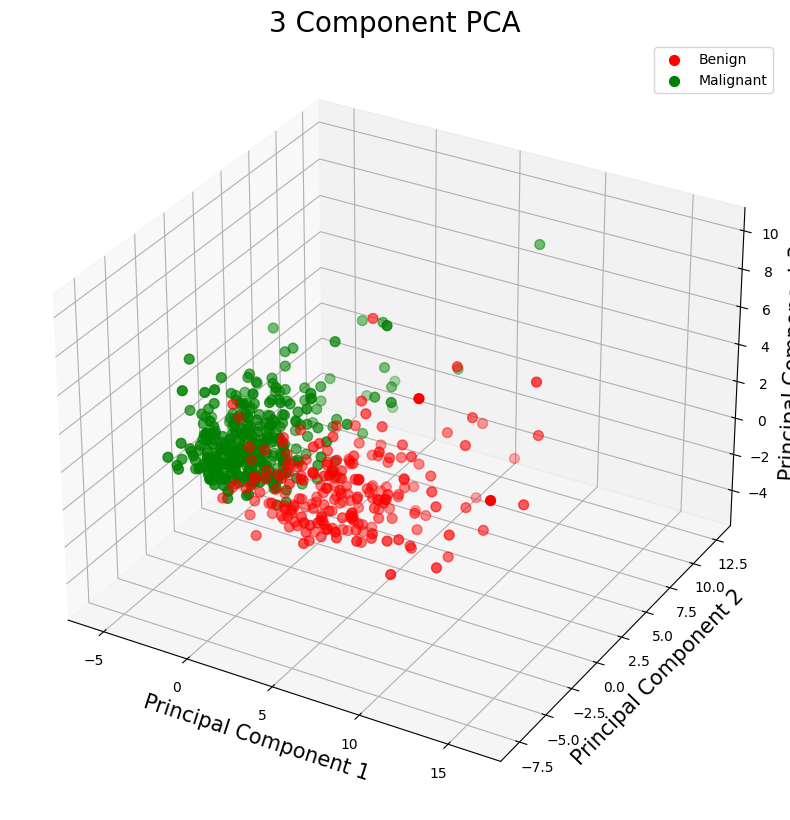

In [22]:
# Perform PCA with 3 components
pca_breast3 = PCA(n_components = 3)
principalComponents_breast3 = pca_breast3.fit_transform(x)

# Create a DataFrame for the principal components
principal_breast_Df3 = pd.DataFrame(data = principalComponents_breast3
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

# Print the last few rows
table3 = tabulate(principal_breast_Df3.tail(), headers='keys', tablefmt='pretty')
print(table3)

# Print explained variation per principal component
print('Explained variation per principal component: {}'.format(pca_breast3.explained_variance_ratio_))

# Create a 3D scatter plot
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 Component PCA', fontsize = 20)

targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    ax.scatter(principal_breast_Df3.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df3.loc[indicesToKeep, 'principal component 2']
               , principal_breast_Df3.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()

# **Four Components Breast Cancer Dataset & Plot**

+-----+-----------------------+-----------------------+-----------------------+-----------------------+
|     | principal component 1 | principal component 2 | principal component 3 | principal component 4 |
+-----+-----------------------+-----------------------+-----------------------+-----------------------+
| 564 |   6.439315483205011   |  -3.5768174627300215  |   2.459488443941798   |   1.177323479016324   |
| 565 |  3.7933823695228672   |  -3.5840478567475564  |   2.088476967353102   |  -2.506025216935882   |
| 566 |  1.2561792751758294   |  -1.9022967087121532  |  0.5627320642587116   |  -2.0892203922951795  |
| 567 |  10.374794059305922   |  1.6720101063019333   |  -1.8770288331785348  |  -2.3560279812815725  |
| 568 |  -5.4752432988804856  |  -0.6706368241627834  |  1.4904380358241875   |  -2.299178356172637   |
+-----+-----------------------+-----------------------+-----------------------+-----------------------+
Explained variation per principal component: [0.44272026 0.18971

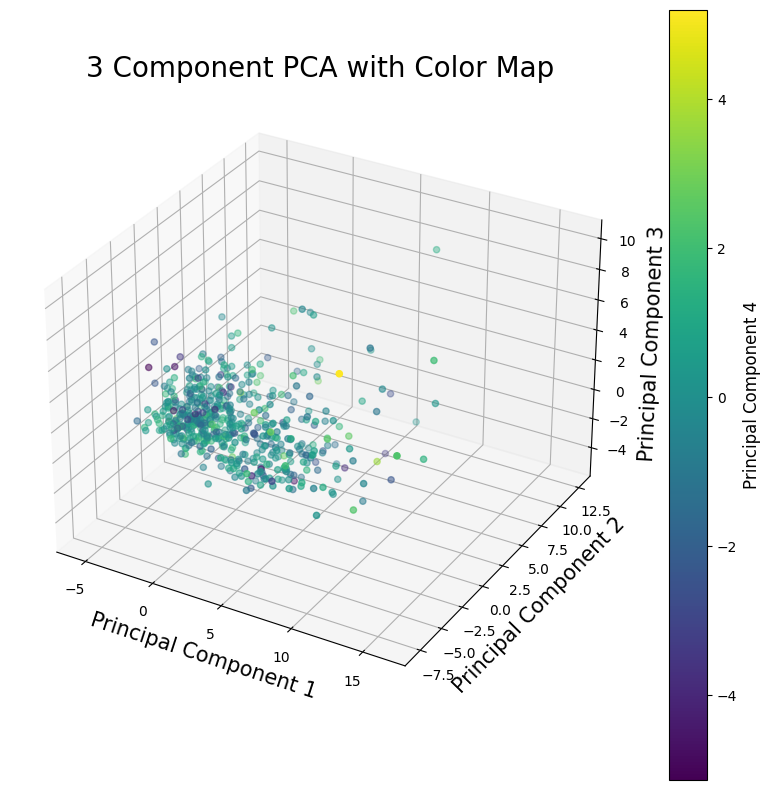

In [23]:
# Perform PCA with 4 components
pca_breast4 = PCA(n_components = 4)
principalComponents_breast4 = pca_breast4.fit_transform(x)

# Create a DataFrame for the principal components
principal_breast_Df4 = pd.DataFrame(data = principalComponents_breast4
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])

# Print the last few rows
table4 = tabulate(principal_breast_Df4.tail(), headers='keys', tablefmt='pretty')
print(table4)

# Print explained variation per principal component
print('Explained variation per principal component: {}'.format(pca_breast4.explained_variance_ratio_))

# Create a 3D scatter plot with color map for the fourth component
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_zlabel('Principal Component 3', fontsize=15)
ax.set_title('3 Component PCA with Color Map', fontsize=20)

# Scatter plot with color map based on the fourth component
scatter = ax.scatter(principal_breast_Df4['principal component 1'],
                     principal_breast_Df4['principal component 2'],
                     principal_breast_Df4['principal component 3'],
                     c=principal_breast_Df4['principal component 4'],
                     cmap='viridis')

# Add a color bar which maps values to colors
cbar = plt.colorbar(scatter)
cbar.set_label('Principal Component 4', fontsize=12)

plt.show()

# **Five Components Breast Cancer Dataset & Plot**

+-----+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+
|     | principal component 1 | principal component 2 | principal component 3 | principal component 4 | principal component 5 |
+-----+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+
| 564 |   6.439315483443615   |  -3.5768174469960177  |   2.459486553602055   |   1.177315305660625   | -0.07482374569819542  |
| 565 |  3.7933823700636236   |  -3.584047867301844   |   2.088476337377869   |  -2.5060280780296984  |  -0.5107224156019075  |
| 566 |   1.256179276709817   |  -1.9022967133256325  |  0.5627304837807708   |  -2.0892286099595507  |  1.8099909486281531   |
| 567 |  10.374794060106813   |  1.6720101079245961   |  -1.8770293572936323  |  -2.3560319951319832  | -0.03374187114518513  |
| 568 |  -5.475243304300826   |  -0.6706367854415421  |   1.490443277456629   |  -2.2991517722527153  | 

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


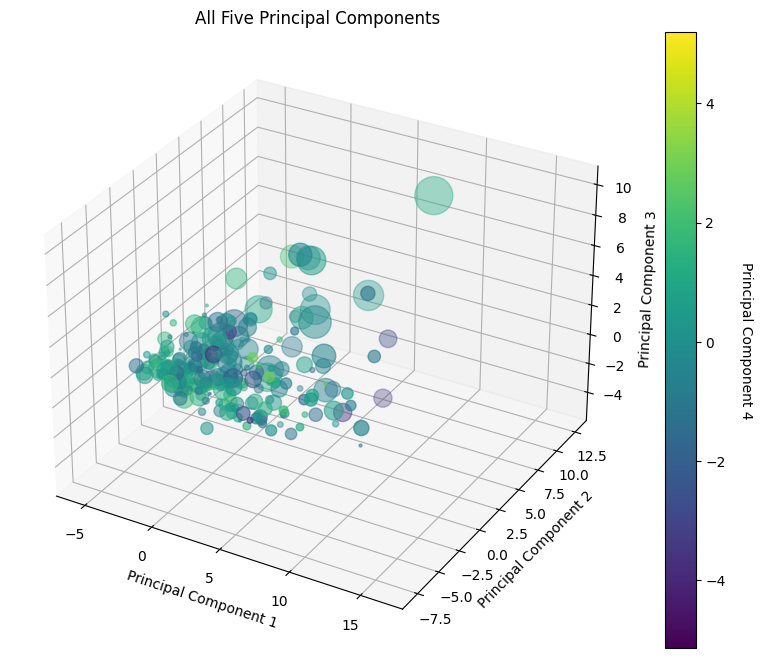

In [24]:
# Perform PCA with 5 components
pca_breast5 = PCA(n_components = 5)
principalComponents_breast5 = pca_breast5.fit_transform(x)

# Create a DataFrame for the principal components
principal_breast_Df5 = pd.DataFrame(data = principalComponents_breast5
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])

# Print the last few rows
table5 = tabulate(principal_breast_Df5.tail(), headers='keys', tablefmt='pretty')
print(table5)

# Print explained variation per principal component
print('Explained variation per principal component: {}'.format(pca_breast5.explained_variance_ratio_))


principal_breast_Df5 = pd.DataFrame(
    data=principalComponents_breast5,
    columns=[
        'principal component 1',
        'principal component 2',
        'principal component 3',
        'principal component 4',
        'principal component 5'
    ]
)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot all five components in a single 3D scatter plot
sc = ax.scatter(
    principal_breast_Df5['principal component 1'],
    principal_breast_Df5['principal component 2'],
    principal_breast_Df5['principal component 3'],
    c=principal_breast_Df5['principal component 4'],  # Color by PC4
    s=principal_breast_Df5['principal component 5']*100,  # Size by PC5
    cmap='viridis'
)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('All Five Principal Components')

# Create a colorbar for the scatter plot
cbar = fig.colorbar(sc)
cbar.set_label('Principal Component 4', rotation=270, labelpad=20)

plt.show()

# Explained Variance Ratio for Principal Components (2 - 5)

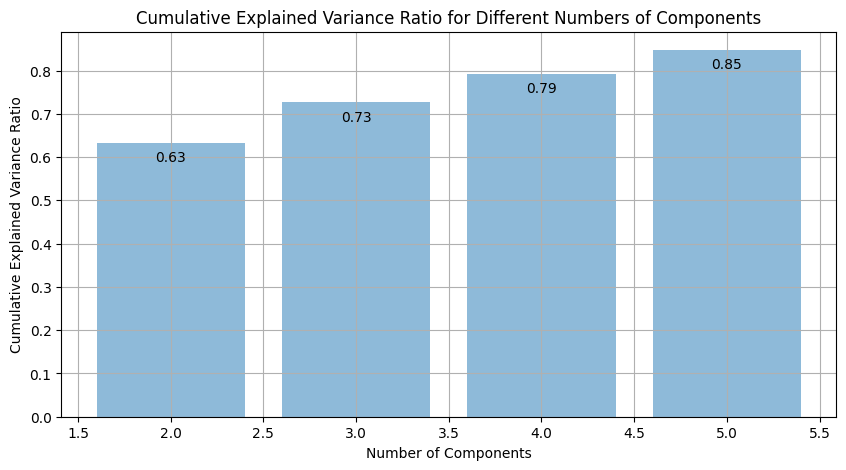

In [ ]:
# Concatenate the explained variance ratios from all PCA objects
explained_variance_ratios = [
    pca_breast2.explained_variance_ratio_,
    pca_breast3.explained_variance_ratio_,
    pca_breast4.explained_variance_ratio_,
    pca_breast5.explained_variance_ratio_
]

# Calculate cumulative explained variance ratio for each number of components
cumulative_variance_ratios = [np.cumsum(variance_ratio)[-1] for variance_ratio in explained_variance_ratios]

# Plotting
plt.figure(figsize=(10,5))

bars = plt.bar(range(2, 6), cumulative_variance_ratios, alpha=0.5)

# Add cumulative values as labels in the bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, f'{cumulative_variance_ratios[i]:.2f}', ha='center', va='bottom')

plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio for Different Numbers of Components')

plt.grid(True)
plt.show()

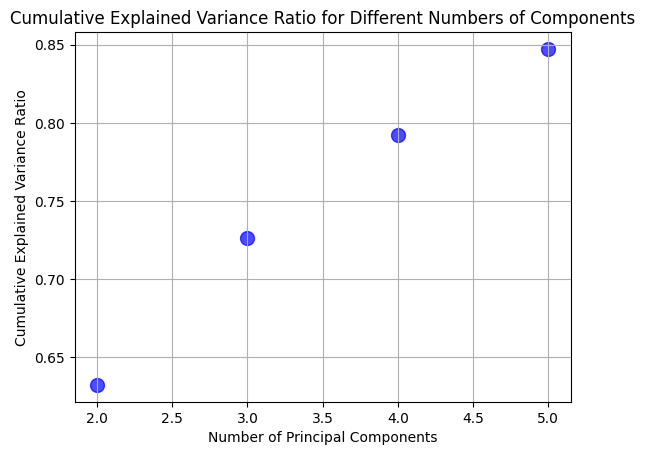

In [ ]:
# Data for plotting
num_components = [pca_breast2.n_components_, pca_breast3.n_components_, pca_breast4.n_components_, pca_breast5.n_components_]
explained_variance_ratios = [pca_breast2.explained_variance_ratio_, pca_breast3.explained_variance_ratio_,
    pca_breast4.explained_variance_ratio_,
    pca_breast5.explained_variance_ratio_
]

# Calculate cumulative explained variance ratio for each number of components
cumulative_variance_ratios = [np.sum(ratios) for ratios in explained_variance_ratios]

# Plotting
plt.figure()
plt.scatter(num_components, cumulative_variance_ratios, s=100, c='b', alpha=0.7)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio for Different Numbers of Components')
plt.grid(True)
plt.show()

# Percentage of Information Lost for Principal Components (2 - 5)

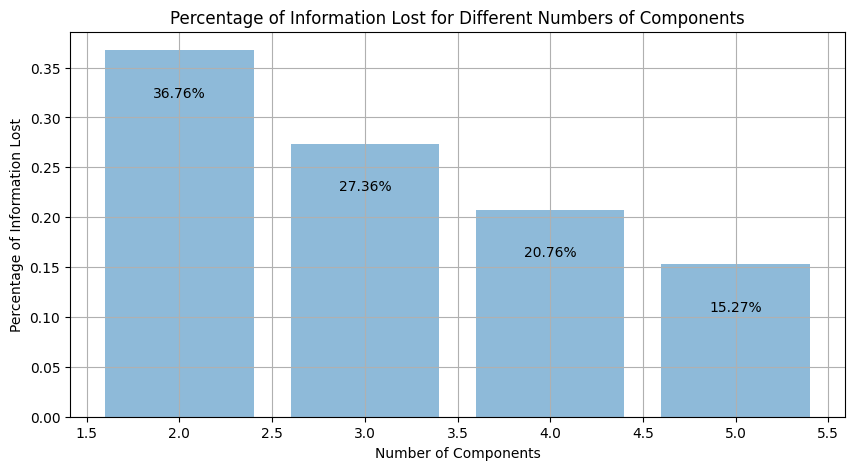

In [ ]:
# Concatenate the explained variance ratios from all PCA objects
explained_variance_ratios = [
    pca_breast2.explained_variance_ratio_,
    pca_breast3.explained_variance_ratio_,
    pca_breast4.explained_variance_ratio_,
    pca_breast5.explained_variance_ratio_
]

# Calculate cumulative explained variance ratio for each number of components
cumulative_variance_ratios = [np.cumsum(variance_ratio)[-1] for variance_ratio in explained_variance_ratios]

# Calculate percentage of information lost for each component
information_lost_percentages = [1 - cumulative_variance_ratio for cumulative_variance_ratio in cumulative_variance_ratios]

# Plotting
plt.figure(figsize=(10,5))

bars = plt.bar(range(2, 6), information_lost_percentages, alpha=0.5)

# Add percentage of information lost as labels in the bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, f'{information_lost_percentages[i]*100:.2f}%', ha='center', va='bottom')

plt.xlabel('Number of Components')
plt.ylabel('Percentage of Information Lost')
plt.title('Percentage of Information Lost for Different Numbers of Components')

plt.grid(True)
plt.show()

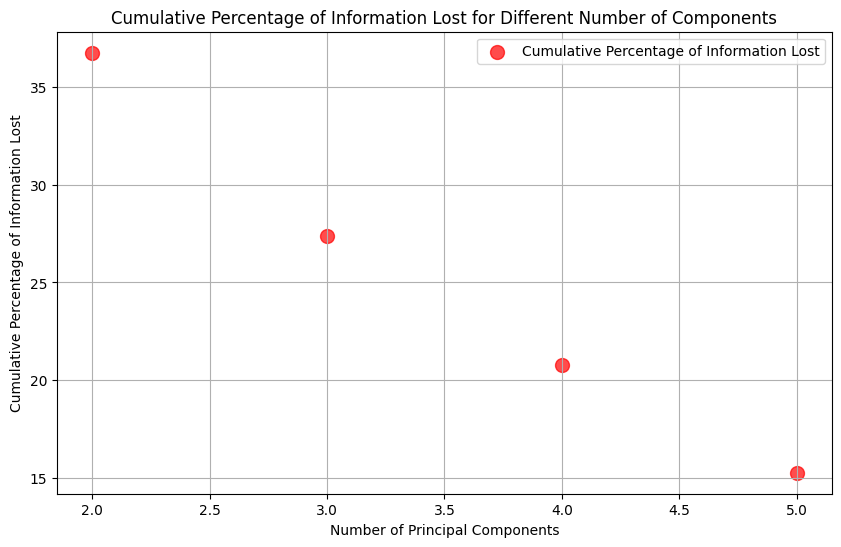

In [ ]:
# Data for plotting
num_components = [pca_breast2.n_components_, pca_breast3.n_components_, pca_breast4.n_components_, pca_breast5.n_components_]
explained_variance_ratios = [pca_breast2.explained_variance_ratio_, pca_breast3.explained_variance_ratio_,
    pca_breast4.explained_variance_ratio_,
    pca_breast5.explained_variance_ratio_
]

# Calculate cumulative explained variance ratio for each number of components
cumulative_variance_ratios = [np.sum(ratios) for ratios in explained_variance_ratios]

# Calculate cumulative percentage of information lost
cumulative_information_lost = [(1 - ratio) * 100 for ratio in cumulative_variance_ratios]

# Plotting
plt.figure(figsize=(10, 6))

# Plot Cumulative Percentage of Information Lost
plt.scatter(num_components, cumulative_information_lost, s=100, c='r', alpha=0.7, label='Cumulative Percentage of Information Lost')

plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Percentage of Information Lost')
plt.title('Cumulative Percentage of Information Lost for Different Number of Components')
plt.legend()
plt.grid(True)
plt.show()

# Explained Variance Ratio and Information Loss Analysis (breast Cancer)

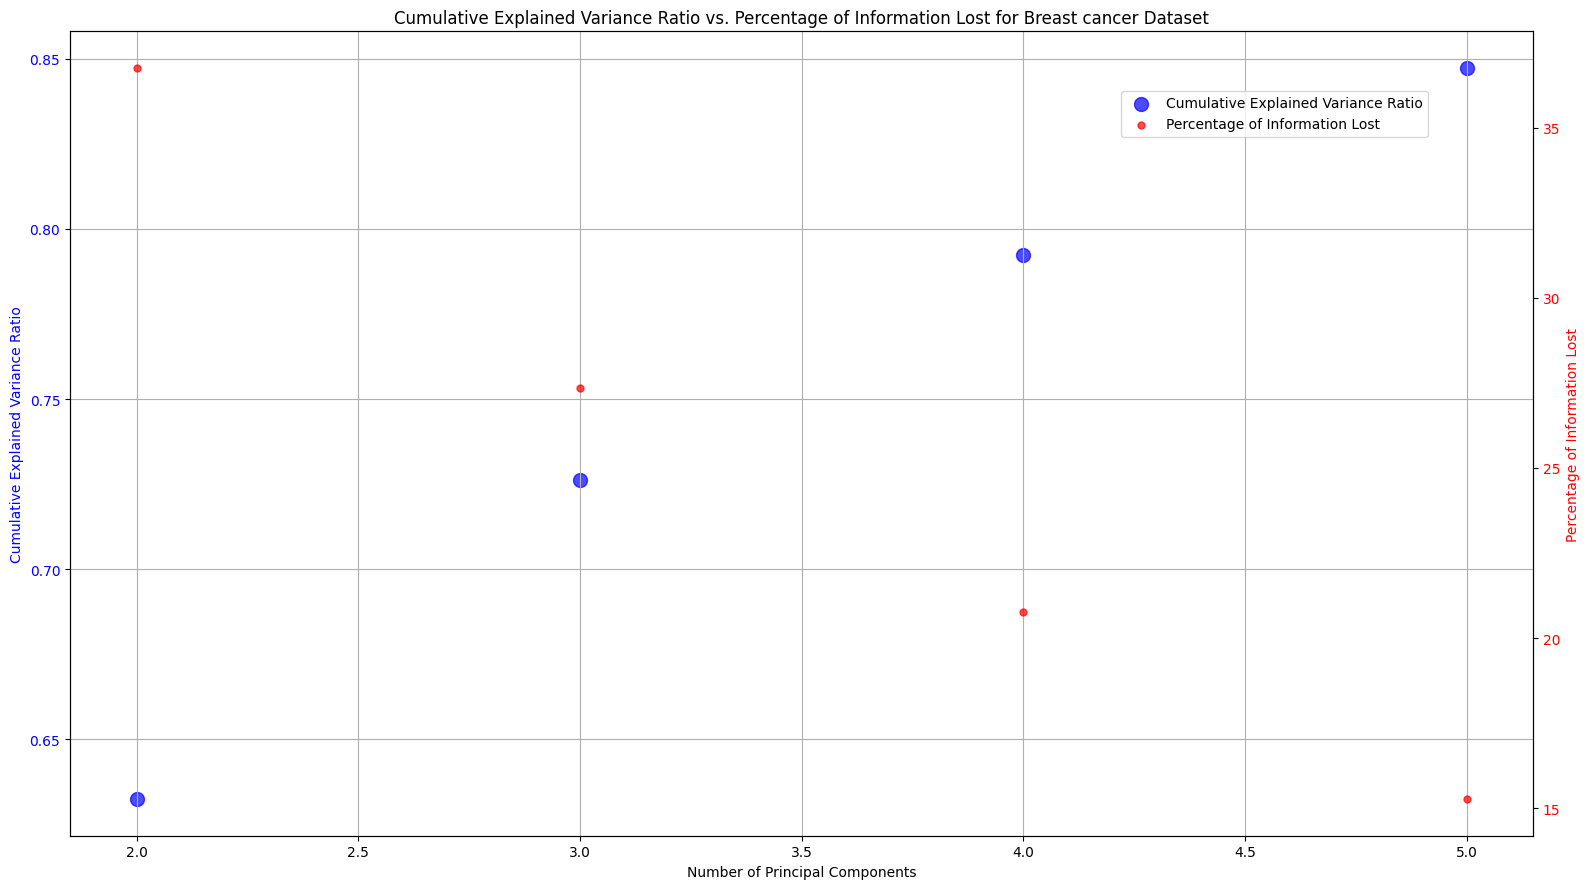

In [25]:
# Data for plotting
num_components_cifar = [pca_breast2.n_components_, pca_breast3.n_components_, pca_breast4.n_components_, pca_breast5.n_components_]
explained_variance_ratios_cifar = [pca_breast2.explained_variance_ratio_, pca_breast3.explained_variance_ratio_,
    pca_breast4.explained_variance_ratio_,
    pca_breast5.explained_variance_ratio_
]

# Calculate cumulative explained variance ratio for each number of components
cumulative_variance_ratios_cifar = [np.cumsum(ratios)[-1] for ratios in explained_variance_ratios_cifar]

# Calculate percentage of information lost
information_lost_cifar = [(1 - ratio) * 100 for ratio in cumulative_variance_ratios_cifar]

# Plotting
fig, ax1_cifar = plt.subplots(figsize=(16, 9))

# Scatter plot for Cumulative Explained Variance Ratio
ax1_cifar.scatter(num_components_cifar, cumulative_variance_ratios_cifar, s=100, c='b', alpha=0.7, label='Cumulative Explained Variance Ratio')
ax1_cifar.set_xlabel('Number of Principal Components')
ax1_cifar.set_ylabel('Cumulative Explained Variance Ratio', color='b')
ax1_cifar.tick_params(axis='y', labelcolor='b')
ax1_cifar.grid(True)

# Create a second y-axis for Percentage of Information Lost
ax2_cifar = ax1_cifar.twinx()
ax2_cifar.scatter(num_components_cifar, information_lost_cifar, s=25, c='r', alpha=0.7, label='Percentage of Information Lost')
ax2_cifar.set_ylabel('Percentage of Information Lost', color='r')
ax2_cifar.tick_params(axis='y', labelcolor='r')

# Add legends and title
plt.title('Cumulative Explained Variance Ratio vs. Percentage of Information Lost for Breast cancer Dataset')
fig.tight_layout()
fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9))

plt.show()

# **Preprocessing CIFAR-10 Dataset**

In [ ]:
# Normalize the pixel values between 0 and 1
x_train = x_train/255.0

In [ ]:
# Check the minimum and maximum values after normalization
print('Minimum and Maximum values after normalization are (', np.min(x_train), ') and (', np.max(x_train), ')')

Minimum and Maximum values after normalization are ( 0.0 ) and ( 1.0 )


In [ ]:
# Check the shape of the training data
print('The shape of the training data are', x_train.shape)

The shape of the training data are (50000, 32, 32, 3)


In [ ]:
# Flatten the 32x32x3 images into a single vector of length 3072
x_train_flat = x_train.reshape(-1,3072)

In [ ]:
# Create feature column names for the DataFrame
feat_cols = ['pixel'+str(i) for i in range(x_train_flat.shape[1])]

In [ ]:
# Create a DataFrame for the flattened training data
df_cifar = pd.DataFrame(x_train_flat,columns=feat_cols)

In [ ]:
# Add the labels to the DataFrame, where 'y_train' contains the class labels
df_cifar['label'] = y_train
print('The size of the dataframe: {}'.format(df_cifar.shape))

The size of the dataframe: (50000, 3073)


In [ ]:
# Display the first few rows of the DataFrame
df_cifar.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,...,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353,6
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,...,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706,9
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313725,0.337255,0.329412,9
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,...,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392,4
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,...,0.294118,0.309804,0.321569,0.278431,0.294118,0.305882,0.286275,0.301961,0.313725,1


# **Two Components (Cifar-10 Dataset) & Plot**

First few rows of Principal Components (2 components) for Cifar10 Dataset:

+---+-----------------------+-----------------------+-----+
|   | principal component 1 | principal component 2 |  y  |
+---+-----------------------+-----------------------+-----+
| 0 |   -6.40101762999085   |  2.7290387485456287   | 6.0 |
| 1 |  0.8297833847904601   |  -0.9499431931257895  | 9.0 |
| 2 |   7.730199777548734   |  -11.522102342887399  | 9.0 |
| 3 |  -10.347817330369779  |  0.0107381540199209   | 4.0 |
| 4 |  -2.6256509834183115  |   -4.96923983884635   | 1.0 |
+---+-----------------------+-----------------------+-----+
Explained variation per principal component: [0.2907663  0.11253144]


<Axes: xlabel='principal component 1', ylabel='principal component 2'>

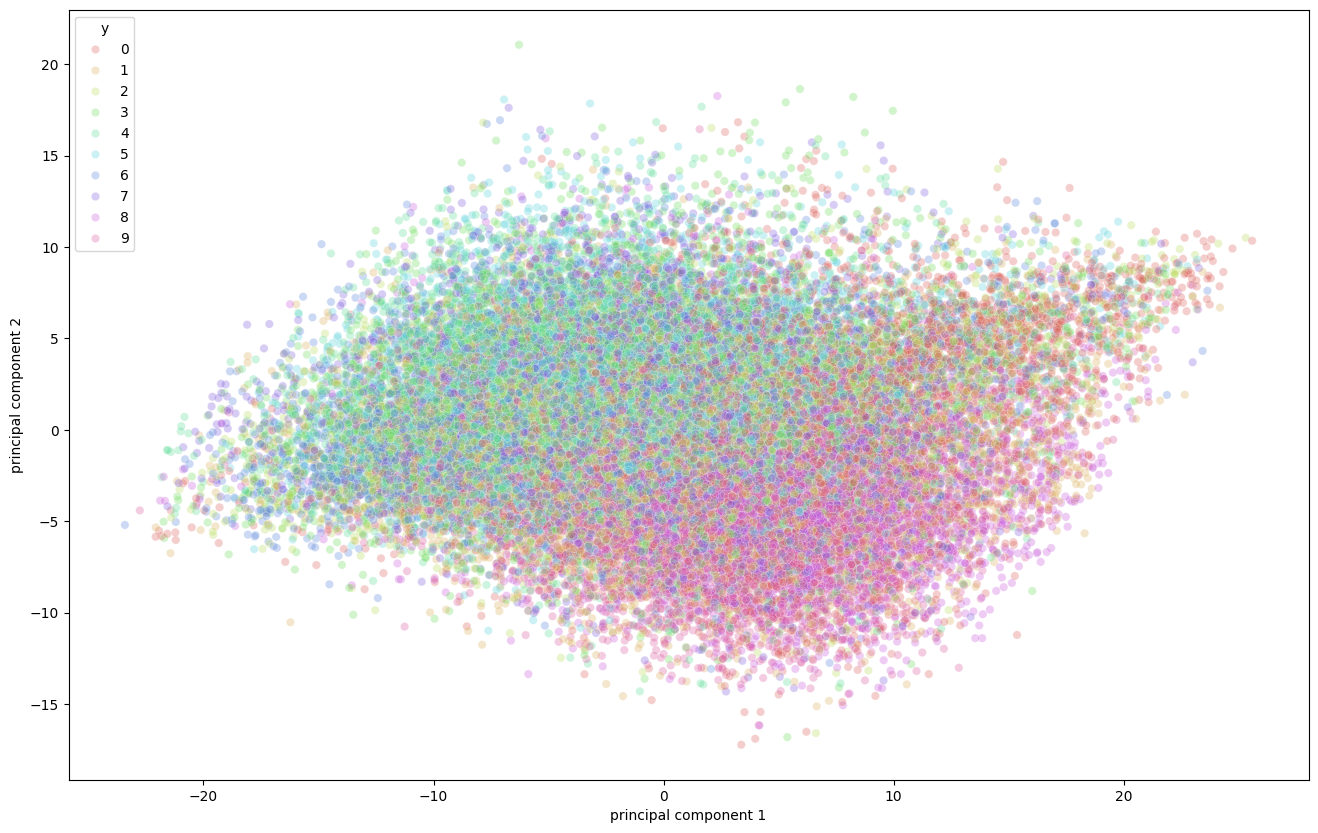

In [ ]:
# Apply PCA with 2 components
pca_cifar2 = PCA(n_components = 2)
principalComponents_cifar2 = pca_cifar2.fit_transform(df_cifar.iloc[:,:-1])

# Create a DataFrame to hold the transformed components
principal_cifar_Df2 = pd.DataFrame(data = principalComponents_cifar2
             , columns = ['principal component 1', 'principal component 2'])
principal_cifar_Df2['y'] = y_train

# Displaying principal_cifar_Df2.head() as a table
table_cifar2 = tabulate(principal_cifar_Df2.head(), headers='keys', tablefmt='pretty')
print("First few rows of Principal Components (2 components) for Cifar10 Dataset:\n")
print(table_cifar2)

# Display the explained variance ratio for the two components
print('Explained variation per principal component: {}'.format(pca_cifar2.explained_variance_ratio_))

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_cifar_Df2,
    legend="full",
    alpha=0.3
)

# **Three Components (Cifar-10 Dataset) & Plot**

First few rows of Principal Components (3 components) for Cifar10 Dataset:

+---+-----------------------+-----------------------+-----------------------+-----+
|   | principal component 1 | principal component 2 | principal component 3 |  y  |
+---+-----------------------+-----------------------+-----------------------+-----+
| 0 |  -6.401017630047566   |   2.729038745455807   |  1.5017093917609987   | 6.0 |
| 1 |  0.8297833848122118   |  -0.9499432313764078  |   6.003752621718236   | 9.0 |
| 2 |  7.7301997775341915   |  -11.522102279972712  |  -2.7536195217806445  | 9.0 |
| 3 |  -10.347817330310072  | 0.010738114916756197  |  1.1010185792678981   | 4.0 |
| 4 |  -2.6256509832153085  |  -4.969239811224281   |  1.0345888283803653   | 1.0 |
+---+-----------------------+-----------------------+-----------------------+-----+
Explained variation per principal component: [0.2907663  0.11253144 0.06694414]


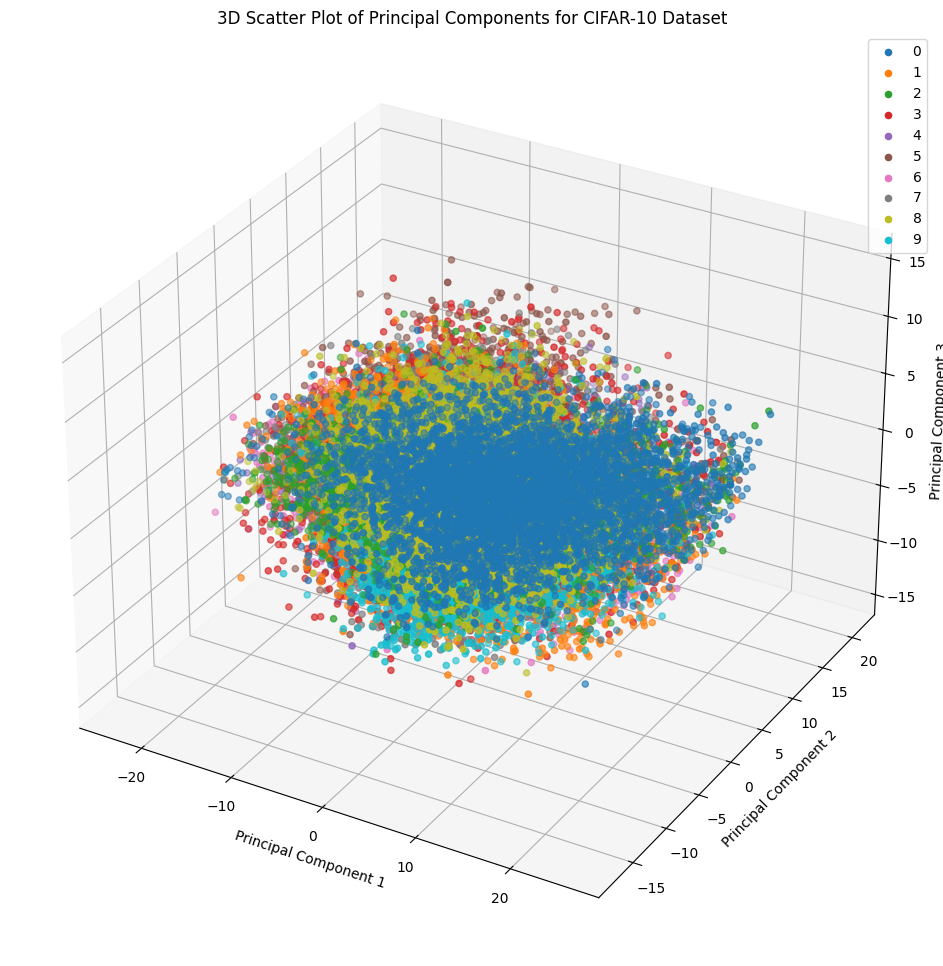

In [ ]:
# Apply PCA with 3 components
pca_cifar3 = PCA(n_components=3)
principalComponents_cifar3 = pca_cifar3.fit_transform(df_cifar.iloc[:,:-1])

# Create a DataFrame to hold the transformed components
principal_cifar_Df3 = pd.DataFrame(data=principalComponents_cifar3,
                                   columns=['principal component 1', 'principal component 2', 'principal component 3'])
principal_cifar_Df3['y'] = y_train

# Displaying principal_cifar_Df3.head() as a table
table_cifar3 = tabulate(principal_cifar_Df3.head(), headers='keys', tablefmt='pretty')
print("First few rows of Principal Components (3 components) for Cifar10 Dataset:\n")
print(table_cifar3)

# Display the explained variance ratio for the three components
print('Explained variation per principal component: {}'.format(pca_cifar3.explained_variance_ratio_))

# Create a figure for the plot
plt.figure(figsize=(22, 12))
ax = plt.axes(projection='3d')

# Scatter plot for 3D visualization with legend
for label in np.unique(principal_cifar_Df3['y']):
    indices = principal_cifar_Df3['y'] == label
    ax.scatter3D(principal_cifar_Df3.loc[indices, 'principal component 1'],
                 principal_cifar_Df3.loc[indices, 'principal component 2'],
                 principal_cifar_Df3.loc[indices, 'principal component 3'],
                 label=label)

# Adding labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Scatter Plot of Principal Components for CIFAR-10 Dataset')
ax.legend()

# Show the plot
plt.show()

# **Four Components (Cifar-10 Dataset) & Plot**

First few rows of Principal Components (4 components) for Cifar10 Dataset:

+---+-----------------------+-----------------------+-----------------------+-----------------------+-----+
|   | principal component 1 | principal component 2 | principal component 3 | principal component 4 |  y  |
+---+-----------------------+-----------------------+-----------------------+-----------------------+-----+
| 0 |  -6.401017630069328   |  2.7290387718326405   |  1.5017098714399622   |  -2.953363032112013   | 6.0 |
| 1 |  0.8297833847911898   |  -0.9499432012897423  |   6.00375162127702    |   1.50488733418029    | 9.0 |
| 2 |   7.730199777572123   |  -11.522102345362285  |  -2.753619998013133   |  2.3335944219409757   | 9.0 |
| 3 |  -10.347817330293763  | 0.010738088045412179  |  1.1010196871872893   |  -1.3044869606309475  | 4.0 |
| 4 |  -2.625650983165593   |  -4.9692399585718405  |  1.0345881483649753   |  3.3066856368754056   | 1.0 |
+---+-----------------------+-----------------------+-------

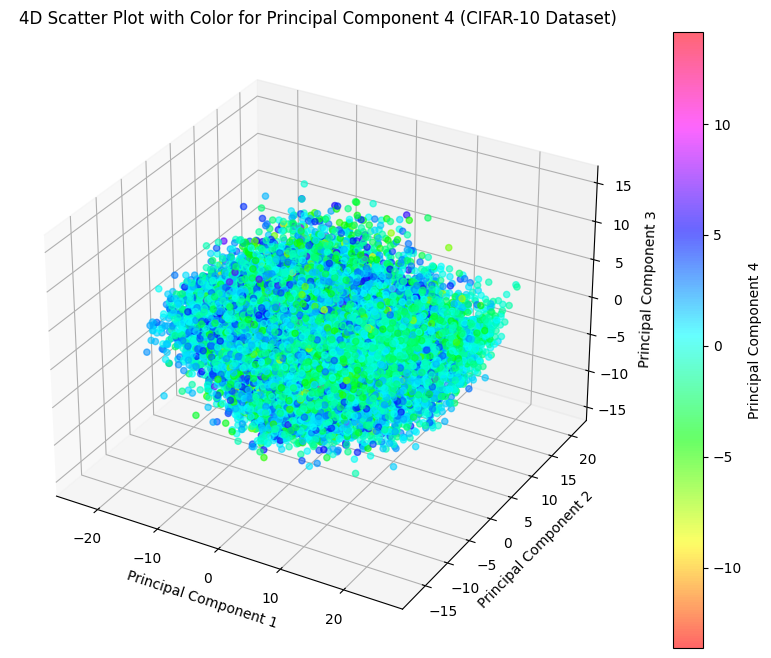

In [ ]:
# Apply PCA with 4 components
pca_cifar4 = PCA(n_components = 4)
principalComponents_cifar4 = pca_cifar4.fit_transform(df_cifar.iloc[:,:-1])

# Create a DataFrame to hold the transformed components
principal_cifar_Df4 = pd.DataFrame(data = principalComponents_cifar4
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])
principal_cifar_Df4['y'] = y_train

# Displaying principal_cifar_Df4.head() as a table
table_cifar4 = tabulate(principal_cifar_Df4.head(), headers='keys', tablefmt='pretty')
print("First few rows of Principal Components (4 components) for Cifar10 Dataset:\n")
print(table_cifar4)

# Display the explained variance ratio for the four components
print('Explained variation per principal component: {}'.format(pca_cifar4.explained_variance_ratio_))

plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')

# Scatter plot for 3D visualization with color based on 4th component
scatter = ax.scatter3D(principal_cifar_Df4['principal component 1'],
                       principal_cifar_Df4['principal component 2'],
                       principal_cifar_Df4['principal component 3'],
                       c=principal_cifar_Df4['principal component 4'],  # Color based on 4th component
                       cmap='hsv',
                       alpha=0.6)

# Adding labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('4D Scatter Plot with Color for Principal Component 4 (CIFAR-10 Dataset)')

# Adding a color bar for the 4th component
plt.colorbar(scatter, label='Principal Component 4')

# Show the plot
plt.show()

# **Five Components (Cifar-10 Dataset) & Plot**

First few rows of Principal Components (5 components) for Cifar10 Dataset:

+---+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----+
|   | principal component 1 | principal component 2 | principal component 3 | principal component 4 | principal component 5 |  y  |
+---+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----+
| 0 |  -6.4010176300480355  |   2.729038757200855   |  1.5017110436975432   |  -2.953404758604298   |  -4.452548407118978   | 6.0 |
| 1 |  0.8297833848125216   |  -0.9499431958053658  |   6.003751422494112   |   1.504994695855633   |  -1.3685128301434364  | 9.0 |
| 2 |   7.730199777527506   |  -11.522102336920238  |  -2.753620875951286   |   2.333650596170377   |  -1.584476371104706   | 9.0 |
| 3 |  -10.34781733031503   | 0.010738111384866713  |   1.101018722555576   |  -1.304560331036535   |  -1.5948738358104455  | 4.0 |


/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


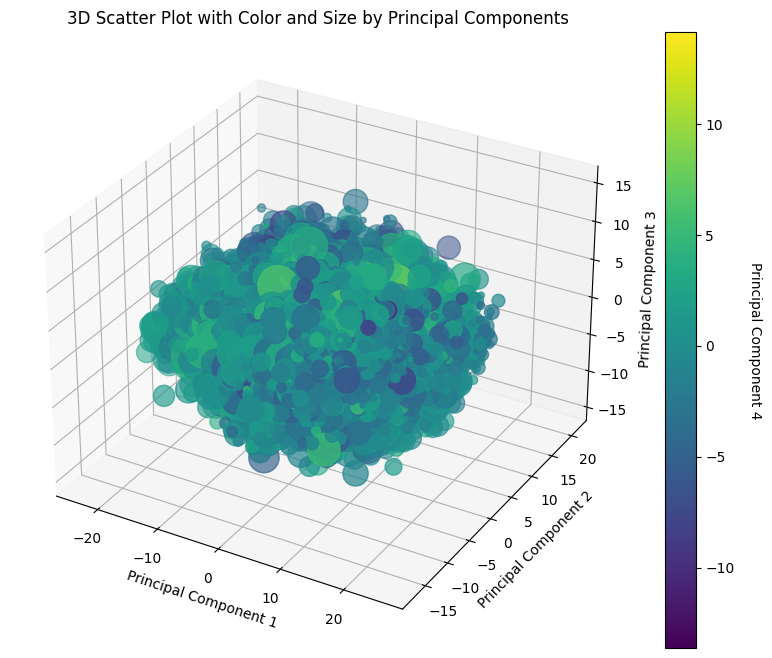

In [ ]:
# Apply PCA with 5 components
pca_cifar5 = PCA(n_components = 5)
principalComponents_cifar5 = pca_cifar5.fit_transform(df_cifar.iloc[:,:-1])

# Create a DataFrame to hold the transformed components
principal_cifar_Df5 = pd.DataFrame(data = principalComponents_cifar5
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])
principal_cifar_Df5['y'] = y_train

# Displaying principal_cifar_Df5.head() as a table
table_cifar5 = tabulate(principal_cifar_Df5.head(), headers='keys', tablefmt='pretty')
print("First few rows of Principal Components (5 components) for Cifar10 Dataset:\n")
print(table_cifar5)

# Display the explained variance ratio for the five components
print('Explained variation per principal component: {}'.format(pca_cifar5.explained_variance_ratio_))

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot all five components in a single 3D scatter plot
sc = ax.scatter(
    principal_cifar_Df5['principal component 1'],
    principal_cifar_Df5['principal component 2'],
    principal_cifar_Df5['principal component 3'],
    c=principal_cifar_Df5['principal component 4'],  # Color by PC4
    s=principal_cifar_Df5['principal component 5'] * 100,  # Size by PC5
    cmap='viridis'
)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Scatter Plot with Color and Size by Principal Components')

# Create a colorbar for the scatter plot
cbar = fig.colorbar(sc)
cbar.set_label('Principal Component 4', rotation=270, labelpad=20)

plt.show()

# Explained Variance Ratio for Principal Components (2 - 5)

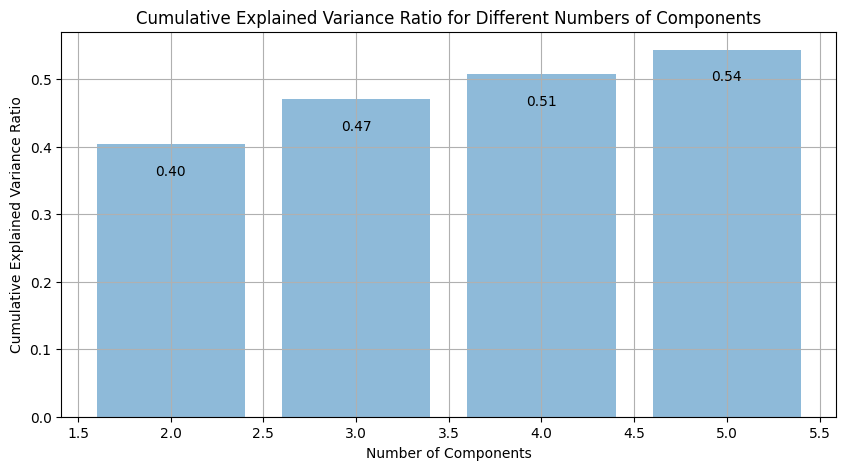

In [ ]:
# Concatenate the explained variance ratios from all PCA objects
explained_variance_ratios = [
    pca_cifar2.explained_variance_ratio_,
    pca_cifar3.explained_variance_ratio_,
    pca_cifar4.explained_variance_ratio_,
    pca_cifar5.explained_variance_ratio_
]

# Calculate cumulative explained variance ratio for each number of components
cumulative_variance_ratios = [np.cumsum(variance_ratio)[-1] for variance_ratio in explained_variance_ratios]

# Plotting
plt.figure(figsize=(10,5))

bars = plt.bar(range(2, 6), cumulative_variance_ratios, alpha=0.5)

# Add cumulative values as labels in the bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, f'{cumulative_variance_ratios[i]:.2f}', ha='center', va='bottom')

plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio for Different Numbers of Components')

plt.grid(True)
plt.show()

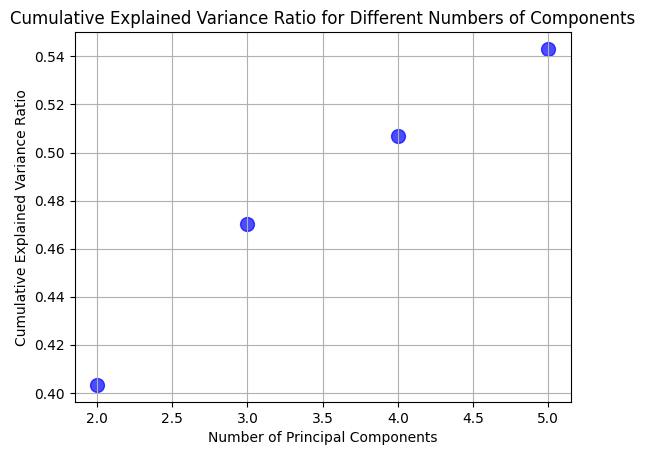

In [ ]:
# Data for plotting
num_components = [pca_cifar2.n_components_, pca_cifar3.n_components_, pca_cifar4.n_components_, pca_cifar5.n_components_]
explained_variance_ratios = [pca_cifar2.explained_variance_ratio_, pca_cifar3.explained_variance_ratio_,
    pca_cifar4.explained_variance_ratio_,
    pca_cifar5.explained_variance_ratio_
]

# Calculate cumulative explained variance ratio for each number of components
cumulative_variance_ratios = [np.sum(ratios) for ratios in explained_variance_ratios]

# Plotting
plt.figure()
plt.scatter(num_components, cumulative_variance_ratios, s=100, c='b', alpha=0.7)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio for Different Numbers of Components')
plt.grid(True)
plt.show()

# Percentage of Information Lost for Principal Components (2 - 5)

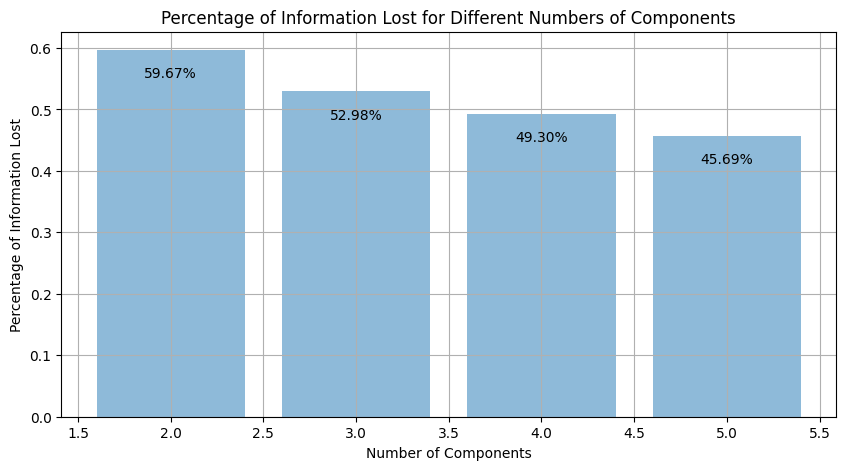

In [ ]:
# Concatenate the explained variance ratios from all PCA objects
explained_variance_ratios = [
    pca_cifar2.explained_variance_ratio_,
    pca_cifar3.explained_variance_ratio_,
    pca_cifar4.explained_variance_ratio_,
    pca_cifar5.explained_variance_ratio_
]

# Calculate cumulative explained variance ratio for each number of components
cumulative_variance_ratios = [np.cumsum(variance_ratio)[-1] for variance_ratio in explained_variance_ratios]

# Calculate percentage of information lost for each component
information_lost_percentages = [1 - cumulative_variance_ratio for cumulative_variance_ratio in cumulative_variance_ratios]

# Plotting
plt.figure(figsize=(10,5))

bars = plt.bar(range(2, 6), information_lost_percentages, alpha=0.5)

# Add percentage of information lost as labels in the bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, f'{information_lost_percentages[i]*100:.2f}%', ha='center', va='bottom')

plt.xlabel('Number of Components')
plt.ylabel('Percentage of Information Lost')
plt.title('Percentage of Information Lost for Different Numbers of Components')

plt.grid(True)
plt.show()

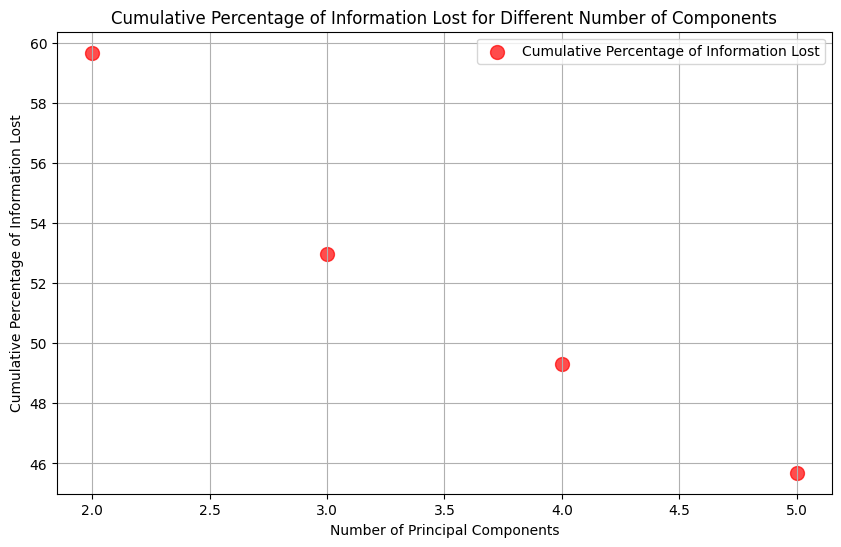

In [ ]:
# Data for plotting
num_components = [pca_cifar2.n_components_, pca_cifar3.n_components_, pca_cifar4.n_components_, pca_cifar5.n_components_]
explained_variance_ratios = [pca_cifar2.explained_variance_ratio_, pca_cifar3.explained_variance_ratio_,
    pca_cifar4.explained_variance_ratio_,
    pca_cifar5.explained_variance_ratio_
]

# Calculate cumulative explained variance ratio for each number of components
cumulative_variance_ratios = [np.sum(ratios) for ratios in explained_variance_ratios]

# Calculate cumulative percentage of information lost
cumulative_information_lost = [(1 - ratio) * 100 for ratio in cumulative_variance_ratios]

# Plotting
plt.figure(figsize=(10, 6))

# Plot Cumulative Percentage of Information Lost
plt.scatter(num_components, cumulative_information_lost, s=100, c='r', alpha=0.7, label='Cumulative Percentage of Information Lost')

plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Percentage of Information Lost')
plt.title('Cumulative Percentage of Information Lost for Different Number of Components')
plt.legend()
plt.grid(True)
plt.show()

# Explained Variance Ratio and Information Loss Analysis (CIFAR-10)

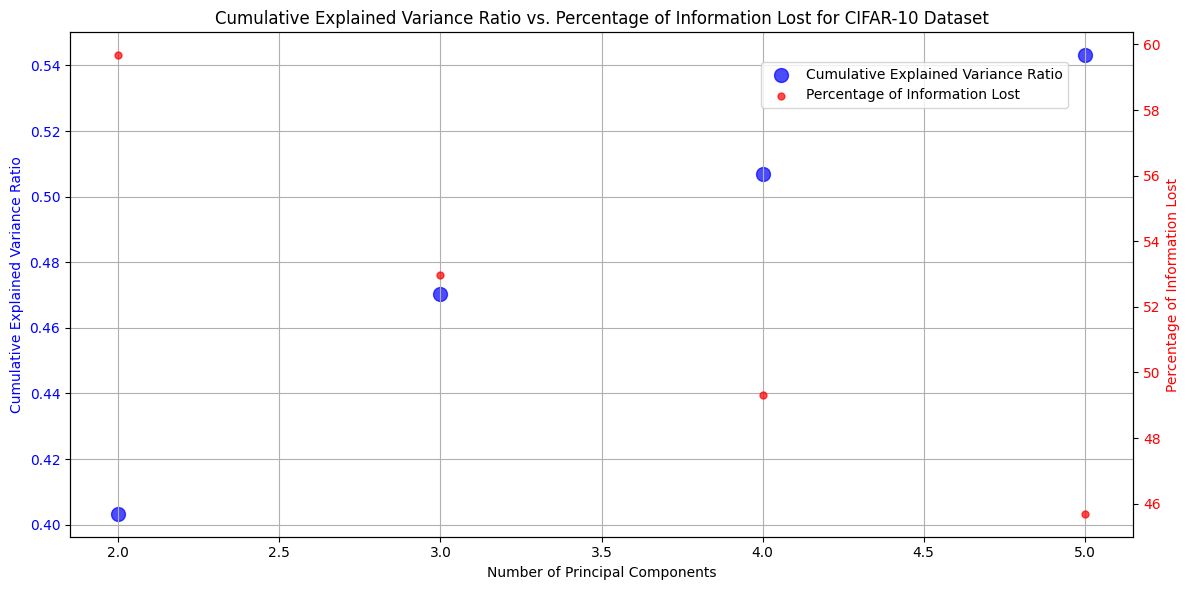

In [ ]:
# Data for plotting
num_components_cifar = [pca_cifar2.n_components_, pca_cifar3.n_components_, pca_cifar4.n_components_, pca_cifar5.n_components_]
explained_variance_ratios_cifar = [pca_cifar2.explained_variance_ratio_, pca_cifar3.explained_variance_ratio_,
    pca_cifar4.explained_variance_ratio_,
    pca_cifar5.explained_variance_ratio_
]

# Calculate cumulative explained variance ratio for each number of components
cumulative_variance_ratios_cifar = [np.cumsum(ratios)[-1] for ratios in explained_variance_ratios_cifar]

# Calculate percentage of information lost
information_lost_cifar = [(1 - ratio) * 100 for ratio in cumulative_variance_ratios_cifar]

# Plotting
fig, ax1_cifar = plt.subplots(figsize=(12, 6))

# Scatter plot for Cumulative Explained Variance Ratio
ax1_cifar.scatter(num_components_cifar, cumulative_variance_ratios_cifar, s=100, c='b', alpha=0.7, label='Cumulative Explained Variance Ratio')
ax1_cifar.set_xlabel('Number of Principal Components')
ax1_cifar.set_ylabel('Cumulative Explained Variance Ratio', color='b')
ax1_cifar.tick_params(axis='y', labelcolor='b')
ax1_cifar.grid(True)

# Create a second y-axis for Percentage of Information Lost
ax2_cifar = ax1_cifar.twinx()
ax2_cifar.scatter(num_components_cifar, information_lost_cifar, s=25, c='r', alpha=0.7, label='Percentage of Information Lost')
ax2_cifar.set_ylabel('Percentage of Information Lost', color='r')
ax2_cifar.tick_params(axis='y', labelcolor='r')

# Add legends and title
plt.title('Cumulative Explained Variance Ratio vs. Percentage of Information Lost for CIFAR-10 Dataset')
fig.tight_layout()
fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9))

plt.show()

# **Setup Training model**

In [ ]:
# Normalize the test data and reshape for model compatibility
x_test = x_test/255.0
x_test = x_test.reshape(-1,32,32,3)
x_test_flat = x_test.reshape(-1,3072)

In [ ]:
PCA(copy=True, iterated_power='auto', random_state=None, svd_solver='auto', tol=0.0, whiten=False)

PCA()

In [ ]:
# Convert labels to categorical for model training
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# Set parameters for model training
batch_size = 128
epochs = 20

# Define the number of classes for the model
num_classes = 10

In [ ]:
print(y_train.shape)
print(y_test.shape )

(50000, 10)
(10000, 10)


# **Training the model Without Speeding up the ML**

In [ ]:
# Define the model architecture without PCA
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train_flat, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(x_test_flat, y_test))

Epoch 1/20
391/391 [==============================] - 44s 110ms/step - loss: 2.1214 - accuracy: 0.2425 - val_loss: 1.9428 - val_accuracy: 0.2714
Epoch 2/20
391/391 [==============================] - 48s 123ms/step - loss: 1.8273 - accuracy: 0.3401 - val_loss: 1.7485 - val_accuracy: 0.3664
Epoch 3/20
391/391 [==============================] - 43s 109ms/step - loss: 1.7352 - accuracy: 0.3759 - val_loss: 1.7183 - val_accuracy: 0.3815
Epoch 4/20
391/391 [==============================] - 45s 114ms/step - loss: 1.6665 - accuracy: 0.3990 - val_loss: 1.6288 - val_accuracy: 0.4140
Epoch 5/20
391/391 [==============================] - 42s 108ms/step - loss: 1.6101 - accuracy: 0.4225 - val_loss: 1.6314 - val_accuracy: 0.4195
Epoch 6/20
391/391 [==============================] - 44s 114ms/step - loss: 1.5623 - accuracy: 0.4394 - val_loss: 1.5635 - val_accuracy: 0.4410
Epoch 7/20
391/391 [==============================] - 41s 105ms/step - loss: 1.5216 - accuracy: 0.4576 - val_loss: 1.5075 - val_ac

# **Training the model With Speeding up the ML**

# PCA hold 90% of the variance

In [ ]:
# Apply PCA with 90% variance
pca9 = PCA(0.9)
pca9.fit(x_train_flat)

# Transform the training and test data
train_img_pca9 = pca9.transform(x_train_flat)
test_img_pca9 = pca9.transform(x_test_flat)

model9 = Sequential()
model9.add(Dense(1024, activation='relu', input_shape=(pca9.n_components_,)))
model9.add(Dense(1024, activation='relu'))
model9.add(Dense(512, activation='relu'))
model9.add(Dense(256, activation='relu'))
model9.add(Dense(num_classes, activation='softmax'))

# Display model summary
print("Input Shape is:", pca9.n_components_)
model9.summary()

# Compile the model with 90% variance
model9.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# Train the model with 90% variance
history9 = model9.fit(train_img_pca9, y_train,batch_size=batch_size,epochs=epochs,verbose=1, validation_data=(test_img_pca9, y_test))

Input Shape is: 99
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 1024)              102400    
                                                                 
 dense_36 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_37 (Dense)            (None, 512)               524800    
                                                                 
 dense_38 (Dense)            (None, 256)               131328    
                                                                 
 dense_39 (Dense)            (None, 10)                2570      
                                                                 
Total params: 1810698 (6.91 MB)
Trainable params: 1810698 (6.91 MB)
Non-trainable params: 0 (0.00 Byte)
_______________________________________________________________

# PCA hold 80% of the variance

In [ ]:
# Apply PCA with 80% variance
pca8 = PCA(0.8)
pca8.fit(x_train_flat)

# Transform the training and test data
train_img_pca8 = pca8.transform(x_train_flat)
test_img_pca8 = pca8.transform(x_test_flat)

# Define the model architecture with 80% variance
model8 = Sequential()
model8.add(Dense(1024, activation='relu', input_shape=(pca8.n_components_,)))
model8.add(Dense(1024, activation='relu'))
model8.add(Dense(512, activation='relu'))
model8.add(Dense(256, activation='relu'))
model8.add(Dense(num_classes, activation='softmax'))

# Display model summary
print("Input Shape is:", pca8.n_components_)
model8.summary()

# Compile the model with 80% variance
model8.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# Train the model with 80% variance
history8 = model8.fit(train_img_pca8, y_train,batch_size=batch_size,epochs=epochs,verbose=1, validation_data=(test_img_pca8, y_test))

Input Shape is: 33
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 1024)              34816     
                                                                 
 dense_41 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_42 (Dense)            (None, 512)               524800    
                                                                 
 dense_43 (Dense)            (None, 256)               131328    
                                                                 
 dense_44 (Dense)            (None, 10)                2570      
                                                                 
Total params: 1743114 (6.65 MB)
Trainable params: 1743114 (6.65 MB)
Non-trainable params: 0 (0.00 Byte)
_______________________________________________________________

# PCA hold 70% of the variance

In [ ]:
# Apply PCA with 70% variance
pca7 = PCA(0.7)
pca7.fit(x_train_flat)

# Transform the training and test data
train_img_pca7 = pca7.transform(x_train_flat)
test_img_pca7 = pca7.transform(x_test_flat)

# Define the model architecture with 70% variance
model7 = Sequential()
model7.add(Dense(1024, activation='relu', input_shape=(pca7.n_components_,)))
model7.add(Dense(1024, activation='relu'))
model7.add(Dense(512, activation='relu'))
model7.add(Dense(256, activation='relu'))
model7.add(Dense(num_classes, activation='softmax'))

# Display model summary
print("Input Shape is:", pca7.n_components_)
model7.summary()

# Compile the model with 70% variance
model7.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# Train the model with 70% variance
history7 = model7.fit(train_img_pca7, y_train,batch_size=batch_size,epochs=epochs,verbose=1, validation_data=(test_img_pca7, y_test))

Input Shape is: 15
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 1024)              16384     
                                                                 
 dense_46 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_47 (Dense)            (None, 512)               524800    
                                                                 
 dense_48 (Dense)            (None, 256)               131328    
                                                                 
 dense_49 (Dense)            (None, 10)                2570      
                                                                 
Total params: 1724682 (6.58 MB)
Trainable params: 1724682 (6.58 MB)
Non-trainable params: 0 (0.00 Byte)
_______________________________________________________________

# PCA hold 60% of the variance

In [ ]:
# Apply PCA with 60% variance
pca6 = PCA(0.6)
pca6.fit(x_train_flat)

# Transform the training and test data
train_img_pca6 = pca6.transform(x_train_flat)
test_img_pca6 = pca6.transform(x_test_flat)

# Define the model architecture with 60% variance
model6 = Sequential()
model6.add(Dense(1024, activation='relu', input_shape=(pca6.n_components_,)))
model6.add(Dense(1024, activation='relu'))
model6.add(Dense(512, activation='relu'))
model6.add(Dense(256, activation='relu'))
model6.add(Dense(num_classes, activation='softmax'))

# Display model summary
print("Input Shape is:", pca6.n_components_)
model6.summary()

# Compile the model with 60% variance
model6.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# Train the model with 60% variance
history6 = model6.fit(train_img_pca6, y_train,batch_size=batch_size,epochs=epochs,verbose=1, validation_data=(test_img_pca6, y_test))

Input Shape is: 8
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 1024)              9216      
                                                                 
 dense_51 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_52 (Dense)            (None, 512)               524800    
                                                                 
 dense_53 (Dense)            (None, 256)               131328    
                                                                 
 dense_54 (Dense)            (None, 10)                2570      
                                                                 
Total params: 1717514 (6.55 MB)
Trainable params: 1717514 (6.55 MB)
Non-trainable params: 0 (0.00 Byte)
_______________________________________________________________

# PCA hold 50% of the variance

In [ ]:
# Apply PCA with 50% variance
pca5 = PCA(0.5)
pca5.fit(x_train_flat)

# Transform the training and test data
train_img_pca5 = pca5.transform(x_train_flat)
test_img_pca5 = pca5.transform(x_test_flat)

# Define the model architecture with 50% variance
model5 = Sequential()
model5.add(Dense(1024, activation='relu', input_shape=(pca5.n_components_,)))
model5.add(Dense(1024, activation='relu'))
model5.add(Dense(512, activation='relu'))
model5.add(Dense(256, activation='relu'))
model5.add(Dense(num_classes, activation='softmax'))

# Display model summary
print("Input Shape is:", pca5.n_components_)
model5.summary()

# Compile the model with 50% variance
model5.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# Train the model with 50% variance
history5 = model5.fit(train_img_pca5, y_train,batch_size=batch_size,epochs=epochs,verbose=1, validation_data=(test_img_pca5, y_test))

Input Shape is: 4
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 1024)              5120      
                                                                 
 dense_56 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_57 (Dense)            (None, 512)               524800    
                                                                 
 dense_58 (Dense)            (None, 256)               131328    
                                                                 
 dense_59 (Dense)            (None, 10)                2570      
                                                                 
Total params: 1713418 (6.54 MB)
Trainable params: 1713418 (6.54 MB)
Non-trainable params: 0 (0.00 Byte)
_______________________________________________________________

# Explained Variance Ratio vs. Number of Principal Components

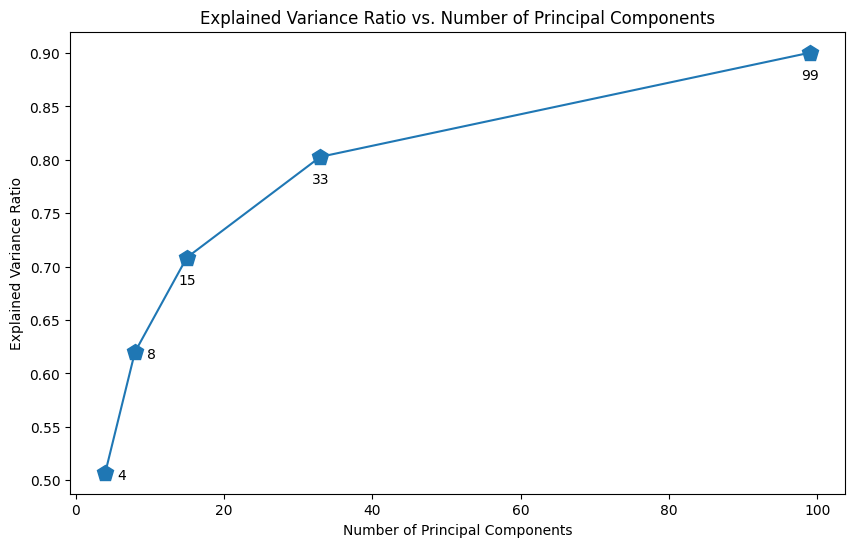

In [ ]:
# Gather PCA objects and their explained variance ratios
pca_variances = [pca9, pca8, pca7, pca6, pca5]
pca_n_components = [pca.n_components_ for pca in pca_variances]
explained_variance_ratios = [pca.explained_variance_ratio_.sum() for pca in pca_variances]

# Plot the Explained Variance Ratio vs. Number of Principal Components
plt.figure(figsize=(10, 6))
plt.plot(pca_n_components, explained_variance_ratios, 'p-', markersize=12)
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')

# Adding text annotations for each point
for i, txt in enumerate(explained_variance_ratios):
    if i == len(pca_n_components) - 1 or i == len(pca_n_components) -2:  # Check if it's the last point
        plt.text(pca_n_components[i] + 2.25, + 0.004 + explained_variance_ratios[i], f'{pca_n_components[i]}', ha='center', va='top', fontsize=10)
    else:
        plt.text(pca_n_components[i], -0.015 + explained_variance_ratios[i], f'{pca_n_components[i]}', ha='center', va='top', fontsize=10)

plt.show()

# Model Performance with Different PCA Configurations

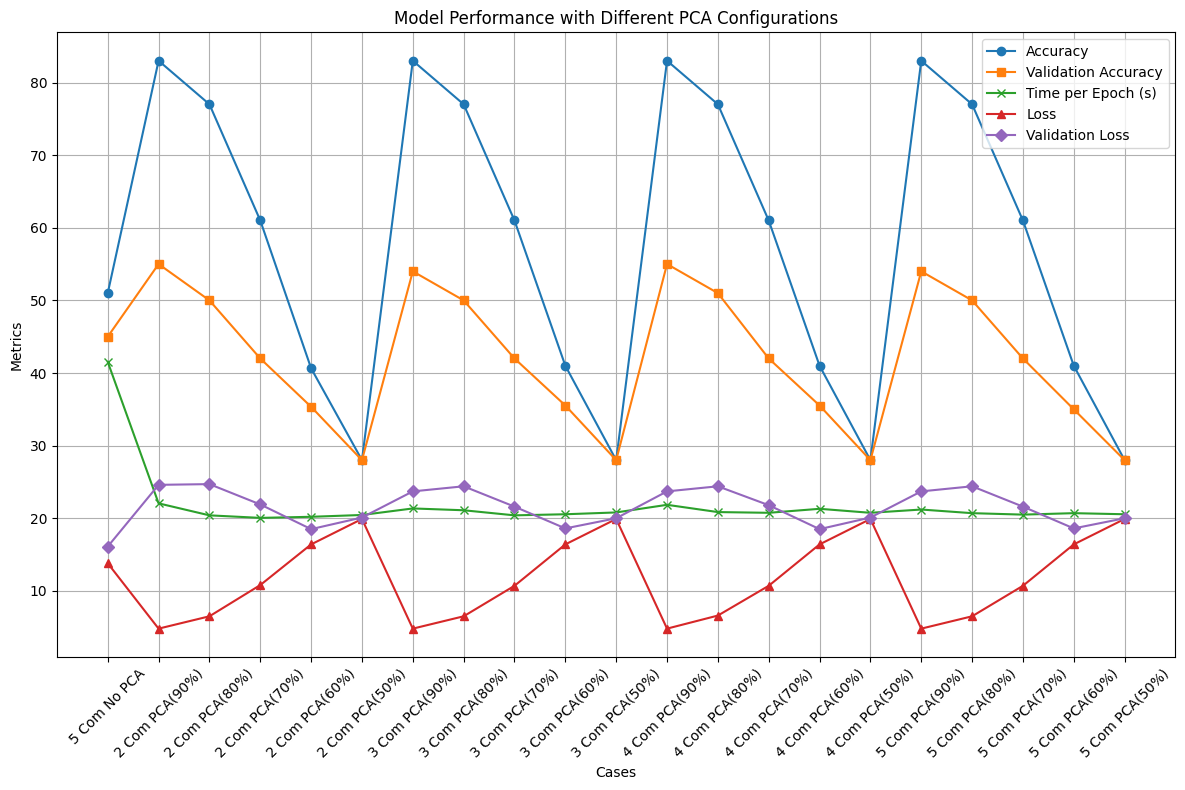

In [ ]:
import matplotlib.pyplot as plt

# Data for plotting
cases = ['5 Com No PCA', '2 Com PCA(90%)', '2 Com PCA(80%)', '2 Com PCA(70%)', '2 Com PCA(60%)', '2 Com PCA(50%)',
         '3 Com PCA(90%)', '3 Com PCA(80%)', '3 Com PCA(70%)', '3 Com PCA(60%)', '3 Com PCA(50%)',
         '4 Com PCA(90%)', '4 Com PCA(80%)', '4 Com PCA(70%)', '4 Com PCA(60%)', '4 Com PCA(50%)',
         '5 Com PCA(90%)', '5 Com PCA(80%)', '5 Com PCA(70%)', '5 Com PCA(60%)', '5 Com PCA(50%)']

accuracy = [51, 83, 77, 61, 40.648, 28, 83, 77, 61, 41, 28,
            83, 77, 61, 41, 28, 83, 77, 61, 41, 28]
val_accuracy = [45, 55, 50, 42, 35.3455, 28, 54, 50, 42, 35.525, 28,
                55, 51, 42, 35.525, 28, 54, 50, 42, 35, 28]
time_per_epoch = [41.53, 22.05, 20.40, 20.05, 20.2, 20.45,
                  21.35, 21.10, 20.40, 20.55, 20.80,
                  21.85, 20.85, 20.75, 21.3, 20.75,
                  21.20, 20.70, 20.50, 20.70, 20.55]
loss = [13.8, 4.8, 6.5, 10.8, 16.4, 19.9, 4.8, 6.5, 10.7, 16.4, 19.9,
        4.8, 6.6, 10.7, 16.4, 19.9, 4.8, 6.5, 10.7, 16.4, 19.9]
val_loss = [16.1, 24.6, 24.7, 21.9, 18.5, 20.1, 23.7, 24.4, 21.6, 18.6, 20,
            23.7, 24.4, 21.8, 18.5, 20.1, 23.7, 24.4, 21.6, 18.6, 20]


# Plotting
plt.figure(figsize=(12, 8))

# Plot lines for accuracy and validation accuracy
plt.plot(cases, accuracy, marker='o', label='Accuracy')
plt.plot(cases, val_accuracy, marker='s', label='Validation Accuracy')

# Plot lines for time and loss
plt.plot(cases, time_per_epoch, marker='x', label='Time per Epoch (s)')
plt.plot(cases, loss, marker='^', label='Loss')
plt.plot(cases, val_loss, marker='D', label='Validation Loss')

# Add labels and title
plt.xlabel('Cases')
plt.ylabel('Metrics')
plt.title('Model Performance with Different PCA Configurations')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
